# Predict the building safety under the earthquake

## First steps

### Load libraries
    - Right now I am just loading some basic libraries. Through the rest of the notebook I will be importing other libraries as needed
    - The library mplcatppuccin is used for some formatting of the graphs on colours I find comfortable. It is possible to just skip it and keep working with the normal colours of the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcatppuccin
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error


# With this line of code I am declaring one of the styles within mplcatppuccin
plt.style.use('mocha')
# Display only two decimals in the dataframe
pd.set_option('display.precision', 2)
# Set number of columns to display in the dataframes so they are not squeezed
pd.set_option('display.max_columns', 500)


### Load the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Just do a quick check that the data has been loaded on both dataframes

In [3]:
train.head()


Column fy Mpa  Beam fy Mpa  Columns 1-3 I mm4*10^6  Columns 4-6 I mm4*10^6   
0          275.0        235.0                   16.73                   10.33  \
1          235.0        235.0                  229.30                  182.60   
2          275.0        235.0                  276.90                    0.00   
3          235.0        235.0                   10.33                    6.06   
4          355.0        355.0                  330.90                    0.00   

   Columns 1-3 A mm2  Columns 4-6 A mm2  Beam I mm4*10^6  Spans   
0             3877.0             3142.0           1119.0    5.0  \
1            12437.0            11253.0            117.7    3.0   
2            13347.0                0.0            117.7    6.0   
3             3142.0             2534.0            920.8    6.0   
4            14276.0                0.0            920.8    3.0   

   Number of floors  Floor height m  Span width m  LLRS tributary width m   
0               4.0             4.0           8.0                    17.5  \
1               6.0             4.0           8.0                    20.0   
2               3.0             4.0           5.0                    10.0   
3               6.0             3.0           5.0                     4.0   
4               2.0             4.0           6.0                     2.0   

   Floor mass kg  Facade Load kN/m  PGA g  Magnitude  Distance to fault km   
0      271342.17               3.0   0.17       6.00                 17.28  \
1      196435.01               4.0   0.15       6.33                 18.96   
2      218011.86               1.0   0.17       6.00                 17.28   
3       43031.34               1.0   0.28       7.28                 19.74   
4       25419.08               4.0   0.17       6.00                 17.28   

   Period s  Max drift mm  Final Dead Load  Final Live Load  soil_class__B   
0      5.18         35.05             10.5              7.0            0.0  \
1      4.54         89.31             12.0              8.0            0.0   
2      1.41         31.49             15.0             10.0            0.0   
3      2.49         27.25              4.0             10.0            0.0   
4      0.31          5.11              8.0              4.0            0.0   

   soil_class__C  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0

In [4]:
test.head()


Column fy Mpa  Beam fy Mpa  Columns 1-3 I mm4*10^6  Columns 4-6 I mm4*10^6   
0          355.0        355.0                 5538.00                 4221.00  \
1          355.0        235.0                 1119.00                    0.00   
2          235.0        235.0                   10.33                    6.06   
3          355.0        235.0                  637.20                    0.00   
4          275.0        235.0                 1119.00                    0.00   

   Columns 1-3 A mm2  Columns 4-6 A mm2  Beam I mm4*10^6  Spans   
0            34685.0            32053.0           231.30    4.0  \
1            21176.0                0.0           482.00    5.0   
2             3142.0             2534.0          1752.00    1.0   
3            17803.0                0.0           231.30    2.0   
4            21176.0                0.0            13.17    1.0   

   Number of floors  Floor height m  Span width m  LLRS tributary width m   
0               4.0             3.0           3.0                     2.5  \
1               1.0             4.0           3.0                     3.0   
2               6.0             3.0           3.0                     8.0   
3               1.0             3.0           8.0                    14.0   
4               2.0             3.0           3.0                     7.5   

   Floor mass kg  Facade Load kN/m  PGA g  Magnitude  Distance to fault km   
0       17579.63               4.0   0.35       6.50                 15.82  \
1       15968.50               0.0   0.14       5.90                 25.50   
2       10531.46               2.0   0.28       7.28                 19.74   
3      165958.21               4.0   0.30       6.60                 10.27   
4        4496.88               0.0   0.15       6.20                 13.91   

   Period s  Final Dead Load  Final Live Load  soil_class__B  soil_class__C  
0      0.22              7.5              5.0            1.0            0.0  
1      0.08              9.0              6.0            0.0            1.0  
2      2.38              8.0             12.0            0.0            1.0  
3      0.34             21.0              7.0            1.0            0.0  
4      0.18              1.5              6.0            1.0            0.0

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Column fy Mpa           2922 non-null   float64
 1   Beam fy Mpa             2922 non-null   float64
 2   Columns 1-3 I mm4*10^6  2922 non-null   float64
 3   Columns 4-6 I mm4*10^6  2922 non-null   float64
 4   Columns 1-3 A mm2       2922 non-null   float64
 5   Columns 4-6 A mm2       2922 non-null   float64
 6   Beam I mm4*10^6         2922 non-null   float64
 7   Spans                   2922 non-null   float64
 8   Number of floors        2922 non-null   float64
 9   Floor height m          2922 non-null   float64
 10  Span width m            2922 non-null   float64
 11  LLRS tributary width m  2922 non-null   float64
 12  Floor mass kg           2922 non-null   float64
 13  Facade Load kN/m        2922 non-null   float64
 14  PGA g                   2922 non-null   

In [6]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Column fy Mpa           325 non-null    float64
 1   Beam fy Mpa             325 non-null    float64
 2   Columns 1-3 I mm4*10^6  325 non-null    float64
 3   Columns 4-6 I mm4*10^6  325 non-null    float64
 4   Columns 1-3 A mm2       325 non-null    float64
 5   Columns 4-6 A mm2       325 non-null    float64
 6   Beam I mm4*10^6         325 non-null    float64
 7   Spans                   325 non-null    float64
 8   Number of floors        325 non-null    float64
 9   Floor height m          325 non-null    float64
 10  Span width m            325 non-null    float64
 11  LLRS tributary width m  325 non-null    float64
 12  Floor mass kg           325 non-null    float64
 13  Facade Load kN/m        325 non-null    float64
 14  PGA g                   325 non-null    fl

### All data is in numeric form. Not easy so far to determine if the data is all continuous or if some of the features could be categorical

## Data Exploration

### First let's do a quick data exploration with the describe function of pandas

In [7]:
train.describe()


Column fy Mpa  Beam fy Mpa  Columns 1-3 I mm4*10^6   
count        2922.00      2922.00                 2922.00  \
mean          287.54       262.01                  849.84   
std            49.53        37.80                 1341.44   
min           235.00       235.00                    3.49   
25%           235.00       235.00                   54.10   
50%           275.00       235.00                  276.90   
75%           355.00       275.00                 1119.00   
max           355.00       355.00                 6447.00   

       Columns 4-6 I mm4*10^6  Columns 1-3 A mm2  Columns 4-6 A mm2   
count                 2922.00            2922.00            2922.00  \
mean                   467.74           14682.85            7316.09   
std                   1104.06            8967.83            9866.53   
min                      0.00            2124.00               0.00   
25%                      0.00            6434.00               0.00   
50%                      3.49           13347.00            2124.00   
75%                    276.90           21176.00           13347.00   
max                   5538.00           40005.00           34685.00   

       Beam I mm4*10^6    Spans  Number of floors  Floor height m   
count          2922.00  2922.00           2922.00         2922.00  \
mean            349.93     3.48              3.50            3.49   
std             436.67     1.72              1.73            0.41   
min               1.71     1.00              1.00            3.00   
25%              38.92     2.00              2.00            3.00   
50%             117.70     3.00              4.00            3.50   
75%             623.90     5.00              5.00            4.00   
max            1752.00     6.00              6.00            4.00   

       Span width m  LLRS tributary width m  Floor mass kg  Facade Load kN/m   
count       2922.00                 2922.00        2922.00           2922.00  \
mean           5.51                    9.74       88359.08              2.02   
std            1.72                    5.81       89732.42              1.42   
min            3.00                    1.50         568.99              0.00   
25%            4.00                    5.00       28087.13              1.00   
50%            6.00                    9.00       59807.44              2.00   
75%            7.00                   12.50      114206.40              3.00   
max            8.00                   24.00      733743.49              4.00   

         PGA g  Magnitude  Distance to fault km  Period s  Max drift mm   
count  2922.00    2922.00               2922.00   2922.00       2922.00  \
mean      0.19       6.41                 20.63      1.42         21.92   
std       0.08       0.39                  7.74      1.28         22.23   
min       0.10       5.90                 10.27      0.06          0.13   
25%       0.12       6.10                 13.91      0.48          7.34   
50%       0.15       6.33                 18.96      1.00         15.38   
75%       0.28       6.69                 25.50      1.94         29.60   
max       0.35       7.28                 35.66      8.68        275.71   

       Final Dead Load  Final Live Load  soil_class__B  soil_class__C  
count          2922.00          2922.00        2922.00        2922.00  
mean              9.65             8.37           0.45           0.55  
std               5.88             4.84           0.50           0.50  
min               1.50             1.50           0.00           0.00  
25%               4.50             4.00           0.00           0.00  
50%               8.00             7.50           0.00           1.00  
75%              14.00            12.00           1.00           1.00  
max              24.00            20.00           1.00           1.00

In [8]:
test.describe()


Column fy Mpa  Beam fy Mpa  Columns 1-3 I mm4*10^6   
count         325.00       325.00                  325.00  \
mean          296.66       266.75                  948.31   
std            51.00        42.47                 1444.10   
min           235.00       235.00                    3.49   
25%           235.00       235.00                   77.63   
50%           275.00       235.00                  330.90   
75%           355.00       275.00                 1119.00   
max           355.00       355.00                 6447.00   

       Columns 4-6 I mm4*10^6  Columns 1-3 A mm2  Columns 4-6 A mm2   
count                  325.00             325.00              325.0  \
mean                   548.07           15343.34             7854.2   
std                   1203.78            9232.94            10436.1   
min                      0.00            2124.00                0.0   
25%                      0.00            7684.00                0.0   
50%                      3.49           14276.00             2124.0   
75%                    330.90           21176.00            14276.0   
max                   5538.00           40005.00            34685.0   

       Beam I mm4*10^6   Spans  Number of floors  Floor height m   
count           325.00  325.00            325.00          325.00  \
mean            337.14    3.50              3.52            3.47   
std             423.99    1.71              1.62            0.41   
min               1.71    1.00              1.00            3.00   
25%              38.92    2.00              2.00            3.00   
50%             117.70    3.00              4.00            3.50   
75%             482.00    5.00              5.00            4.00   
max            1752.00    6.00              6.00            4.00   

       Span width m  LLRS tributary width m  Floor mass kg  Facade Load kN/m   
count        325.00                  325.00         325.00            325.00  \
mean           5.38                   10.12       93682.51              1.99   
std            1.61                    5.89       94928.72              1.40   
min            3.00                    1.50        1358.24              0.00   
25%            4.00                    5.00       28045.83              1.00   
50%            5.00                    9.00       62609.58              2.00   
75%            7.00                   14.00      122465.97              3.00   
max            8.00                   24.00      673099.89              4.00   

        PGA g  Magnitude  Distance to fault km  Period s  Final Dead Load   
count  325.00     325.00                325.00    325.00           325.00  \
mean     0.19       6.42                 20.59      1.42             9.78   
std      0.08       0.39                  7.78      1.19             5.86   
min      0.10       5.90                 10.27      0.08             1.50   
25%      0.12       6.10                 13.91      0.55             4.50   
50%      0.15       6.33                 18.96      1.09             9.00   
75%      0.28       6.69                 25.50      1.92            12.50   
max      0.35       7.28                 35.66      5.89            24.00   

       Final Live Load  soil_class__B  soil_class__C  
count           325.00         325.00         325.00  
mean              8.58           0.46           0.54  
std               4.85           0.50           0.50  
min               1.50           0.00           0.00  
25%               4.50           0.00           0.00  
50%               7.50           0.00           1.00  
75%              12.00           1.00           1.00  
max              20.00           1.00           1.00

### So... a lot of numbers to crak down. Let's show the info of each feature in a histogram since it might be more helpful than having them in a tabular form

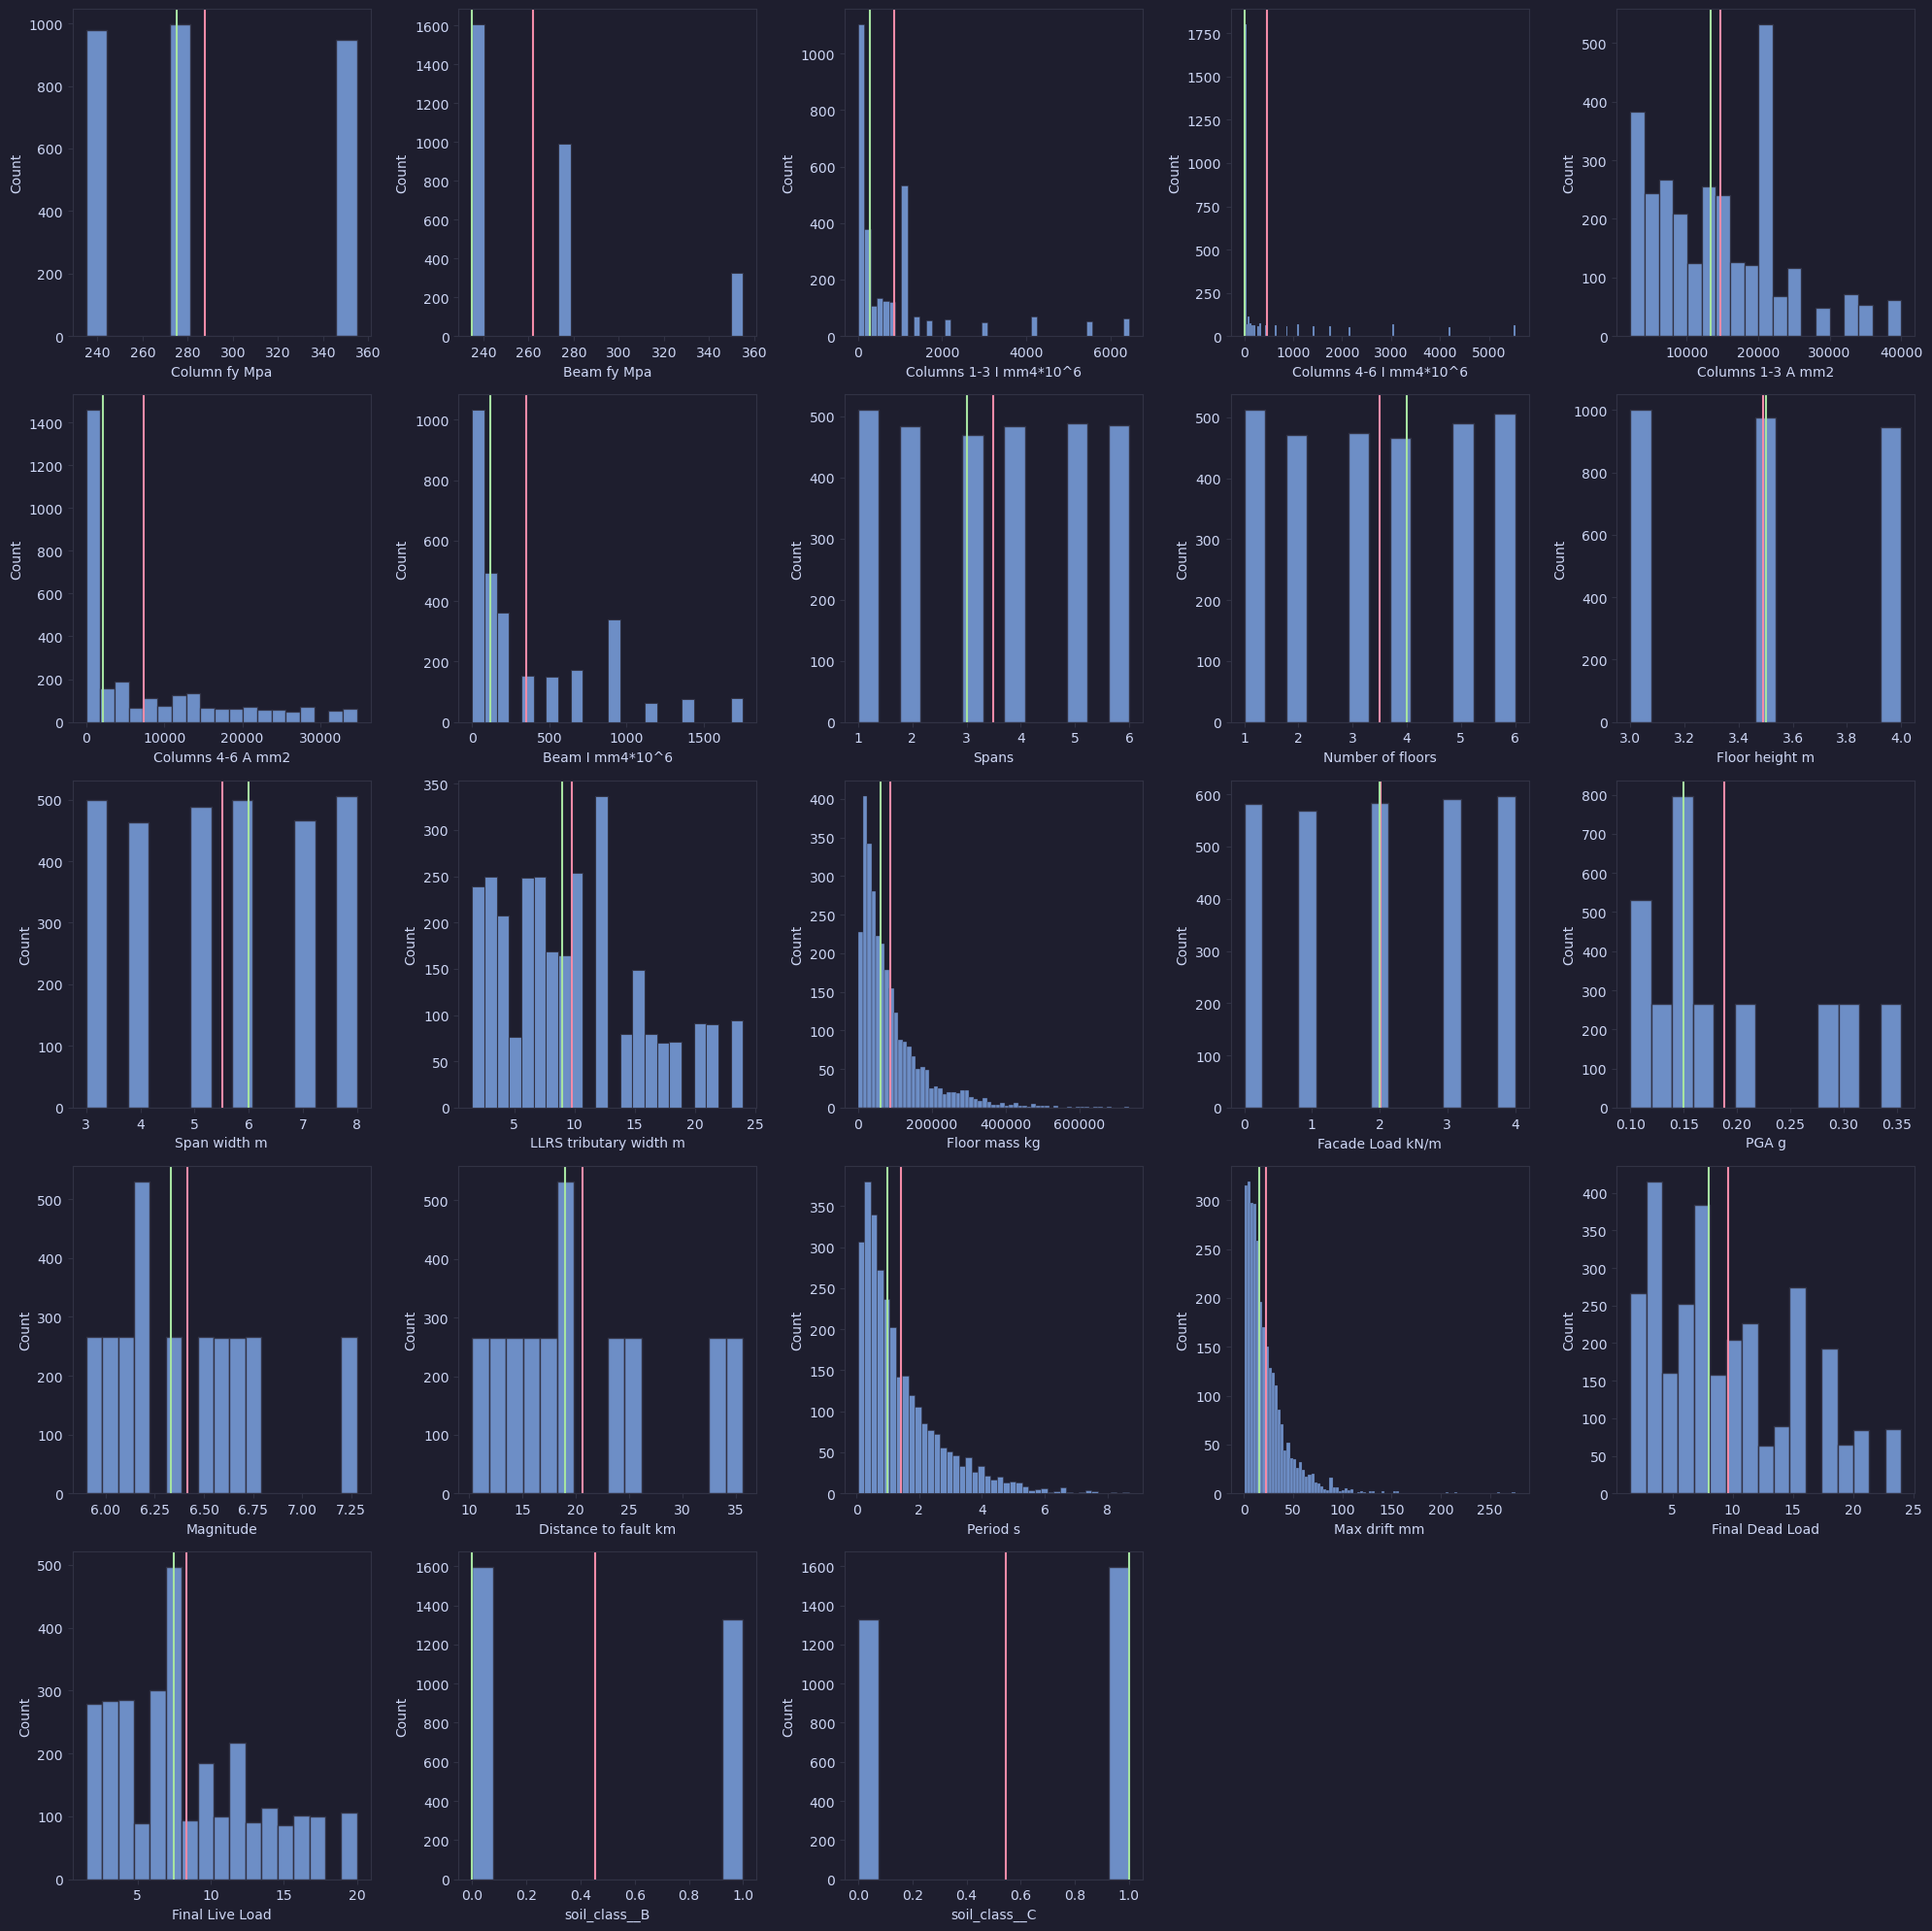

In [9]:
import matplotlib.gridspec as gridspec

nrows = 5
ncols = 5

fig = plt.figure(figsize=(20, 20), tight_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=5)
a = 0
for i in range(nrows):
    for j in range(ncols):
        ax = fig.add_subplot(gs[i, j])
        sns.histplot(data=train, x=train.columns[a], ax=ax)
        ax.axvline(x=train[str(train.columns[a])].mean(),
                   color='#F38BA8')  # plot a red line for the mean
        ax.axvline(x=train[str(train.columns[a])].median(),
                   color='#A6E3A1')  # plot a green line for the median
        a += 1
        if a == 23:
            break


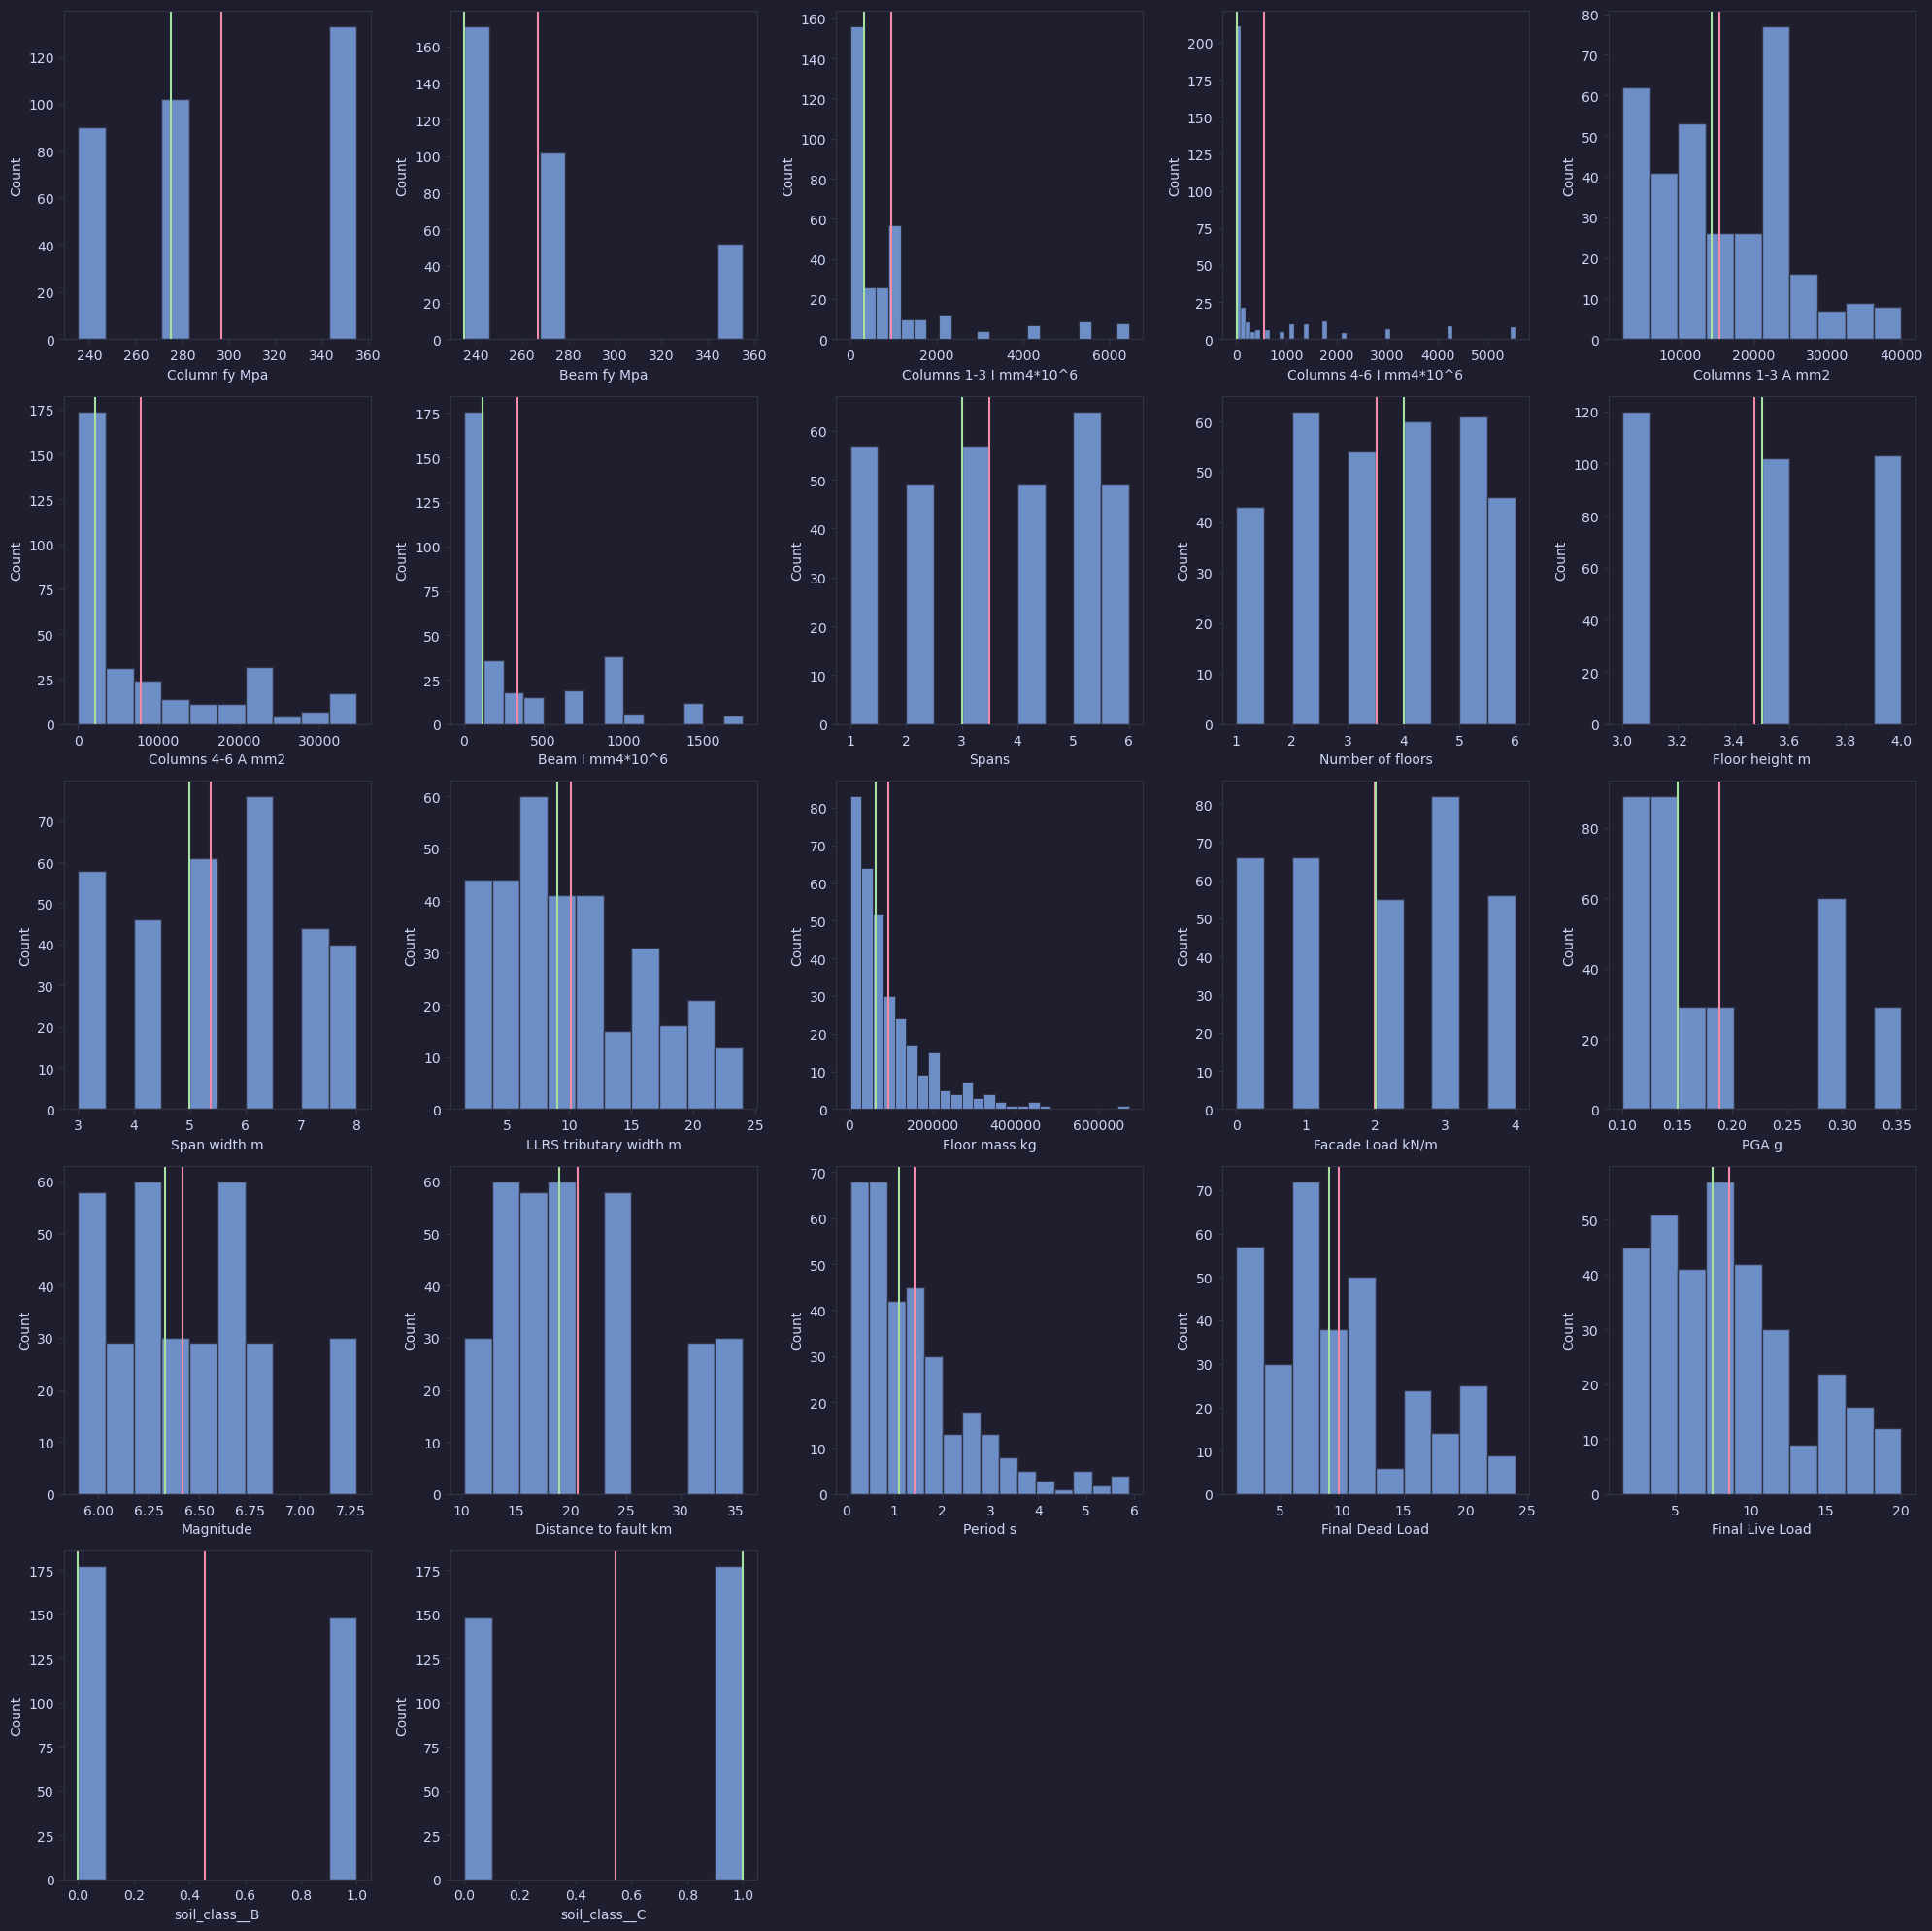

In [10]:
nrows = 5
ncols = 5

fig = plt.figure(figsize=(20,20), tight_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=5)
a=0
for i in range(nrows):
    for j in range(ncols):
        ax = fig.add_subplot(gs[i,j])
        sns.histplot(data=test, x=test.columns[a], ax=ax)
        ax.axvline(x=test[str(test.columns[a])].mean(), color='#F38BA8')
        ax.axvline(x=test[str(test.columns[a])].median(), color='#A6E3A1')
        a+=1
        if a==22:
            break
        

### As expected... a lot easier to inspect  this way. Already some insights, as follows:
    - Apparently some of the features could potentially be changed to categories, i.e. both soil classes
    - Some of the featues are strongly right skewed 

### The next scatter plot will show if there is any relation of the feature to be predicted with the rest of the information. This will help to either closely identify which features have more correlation and also will help in determining if some of the features can actually be changed to category since the data will be grouped only on few numbers

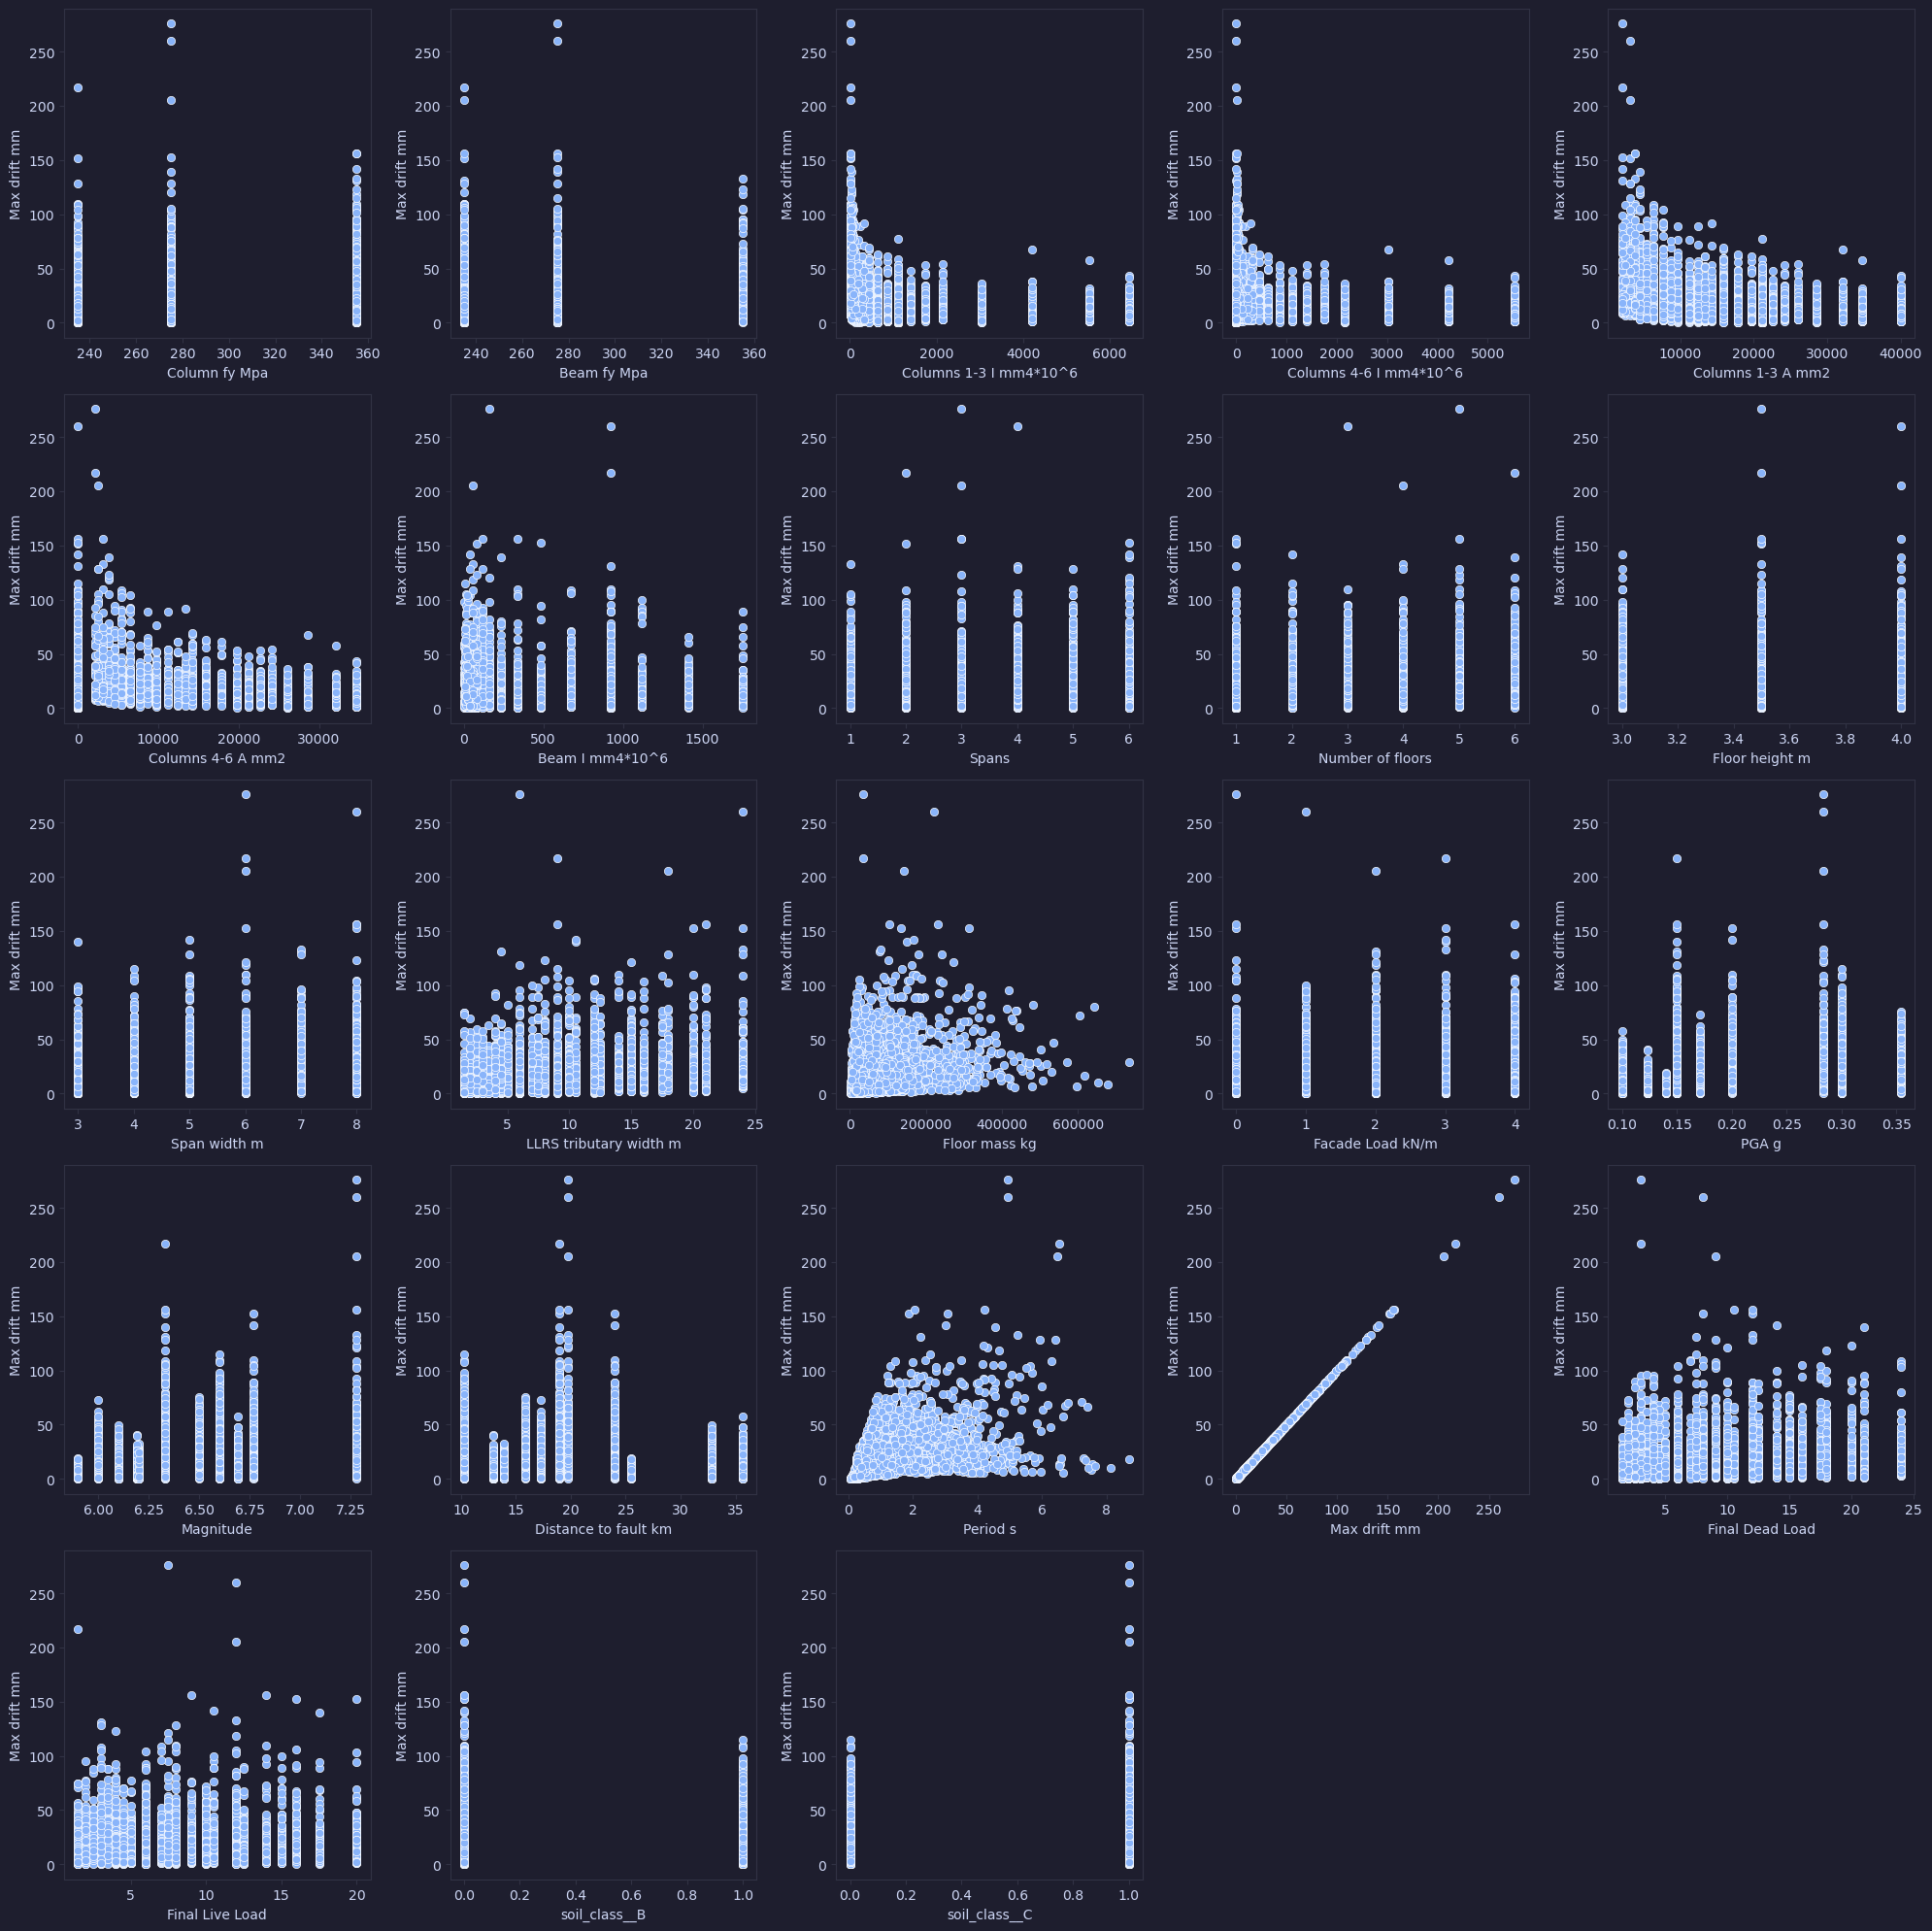

In [11]:
nrows = 5
ncols = 5

fig = plt.figure(figsize=(20, 20), tight_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=5)
a = 0
for i in range(nrows):
    for j in range(ncols):
        ax = fig.add_subplot(gs[i, j])
        sns.scatterplot(
            data=train, x=train.columns[a], y=train['Max drift mm'], ax=ax)
        a += 1
        if a == 23:
            break


### So indeed some of the features can be considered categories. We will change them in the next cells. On the other side, even though some of the continuous features are apparently categories, since there are data contained through several "spans" of bins, we will work with them as if they were continuous (or numerical)

### Let's create a parallel coordinates graphs using plotly express. This type of graph shows the interaction of numerical features. I will include almost all the features in the graph and color them based on the output one. 

### The graph will not include the soil_class columns since those are only one or zero, therefore they won't show any useful information for now. The order of the columns are arbitrarily included to show more or less interactions, although it is possible for you to move them should you want to see how the graph is modified with the columns in different order

### The graph shows a lot of interactions but only in the lower part of the maximum drift, with some a little bit around 100mm

In [12]:
fig = px.parallel_coordinates(train, color='Max drift mm',
                              dimensions=['Max drift mm', 'Spans', 'Magnitude', 'Number of floors', 'Spans', 'Number of floors', 'Floor height m', 'Span width m', 'Facade Load kN/m', 'Columns 1-3 I mm4*10^6', 'Columns 4-6 I mm4*10^6',
                                          'Columns 1-3 A mm2', 'Columns 4-6 A mm2', 'Beam I mm4*10^6', 'LLRS tributary width m', 'Floor mass kg', 'PGA g', 'Distance to fault km', 'Period s', 'Final Dead Load', 'Final Live Load', 'Column fy Mpa', 'Beam fy Mpa'],
                              color_continuous_scale=px.colors.diverging.PiYG)
fig.update_traces(labelangle=-90, labelside='top')
fig.update_layout(margin={'t': 180}, template='plotly_dark')
fig.show()


In [13]:
categories = [
    'Column fy Mpa', 'Beam fy Mpa', 'Spans',
    'Number of floors', 'Spans', 'Number of floors',
    'Floor height m', 'Span width m', 'Facade Load kN/m',
    'soil_class__B', 'soil_class__C'
]

for col in categories:
    train[col] = train[col].astype('category')


### When plotting the feature to predict coloring per category, it can be seen that a lot of the categories still fall in the lowest numbers of movement. Although, and to be completely fair, this might not be the case against other features

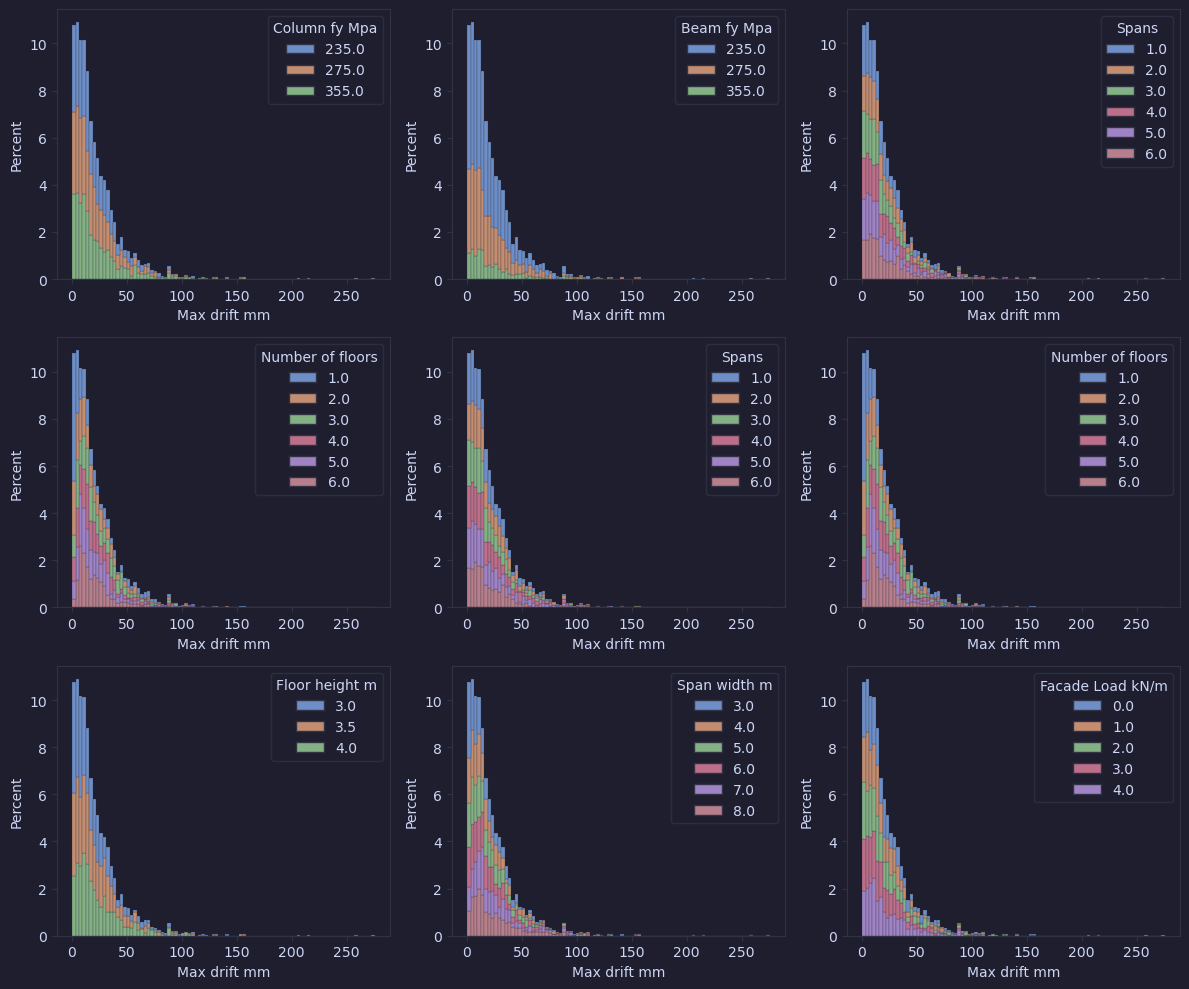

In [14]:
ncols = 3
nrows = 3
a = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(12, 10), tight_layout=True)
for i in range(nrows):
    for j in range(ncols):
        sns.histplot(data=train, x='Max drift mm',
                     hue=categories[a], ax=axs[i, j], stat='percent', multiple='stack')
        a += 1


### The data will be splitted in categories and numerical features for further analysis

In [15]:
numeric_train = train.select_dtypes(exclude='category')
categoric_train = train.select_dtypes(include='category')
print(numeric_train.shape)
print(categoric_train.shape)


(2922, 14)
(2922, 9)


### For most of the categorical values, the amount of data per category is more or less evenly distributed, except for 'Beam fy Mpa'

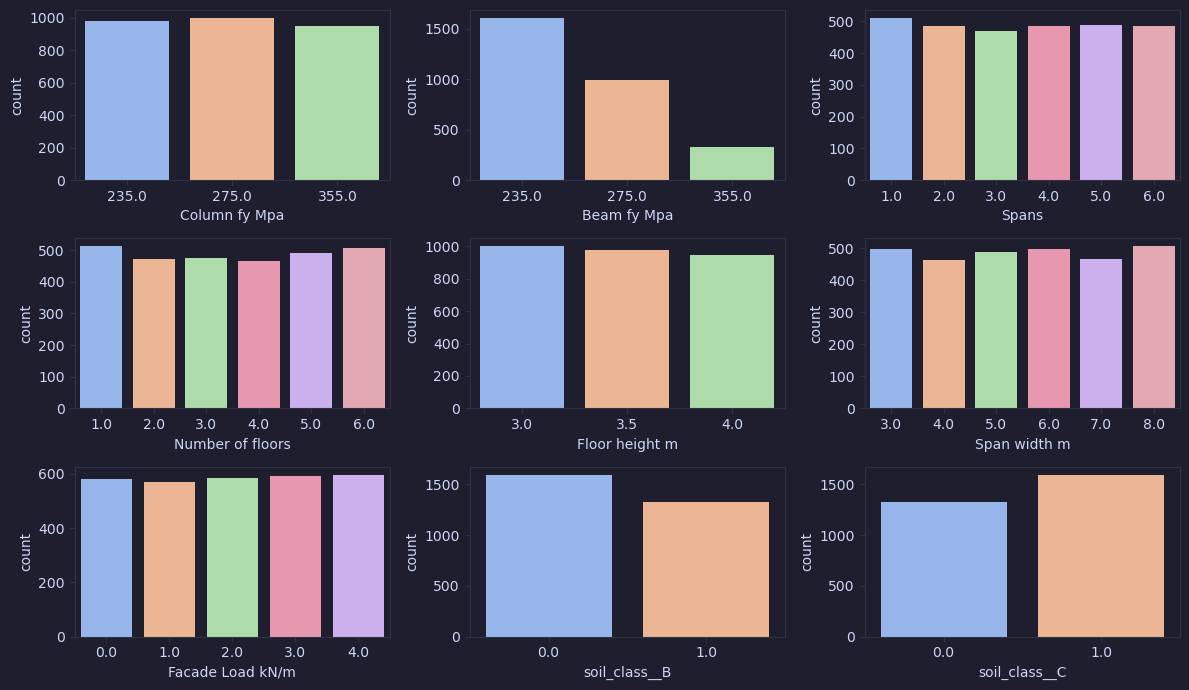

In [16]:
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(12, 7), tight_layout=True)
a = 0
for i in range(nrows):
    for j in range(nrows):
        sns.countplot(data=categoric_train,
                      x=categoric_train.columns[a], ax=axs[i, j])
        a += 1


### Let's draw a parallel categories graph to see if it's possible to find any information

In [17]:
categoric_train['Max drift mm'] = train['Max drift mm']
fig = px.parallel_categories(categoric_train, dimensions=['Floor height m', 'Spans', 'Span width m',
                             'Column fy Mpa', 'Beam fy Mpa', 'Spans', 'Number of floors', 'Number of floors', 'Facade Load kN/m'])
fig.update_traces(bundlecolors=True)
fig.update_layout(template='ggplot2')
fig.show()


### As it is visible in the graph below, there might be a lot of outliers and the data might be dense in certain numbers and in some it might even be just one point, especially for the output feature

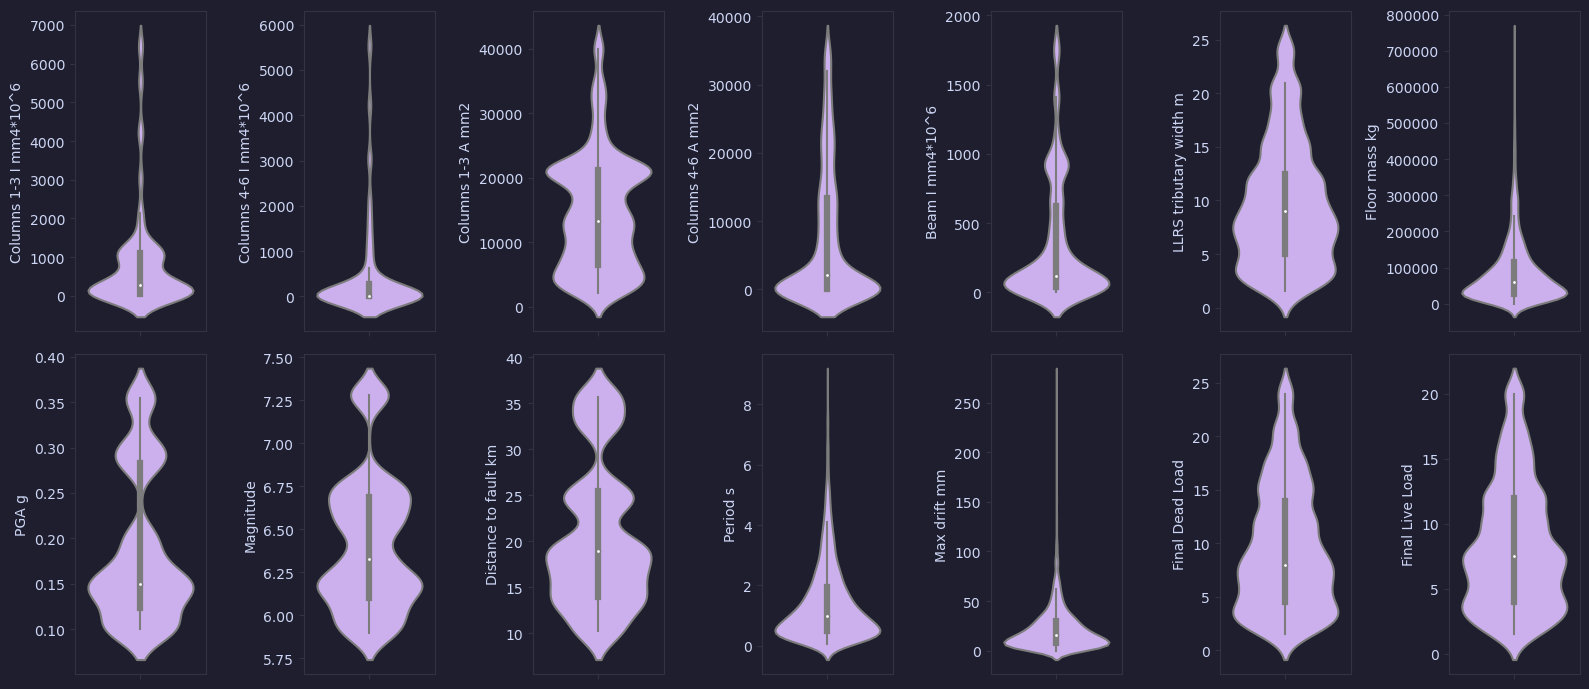

In [18]:
nrows = 2
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(16, 7), tight_layout=True)
a = 0
for i in range(nrows):
    for j in range(ncols):
        sns.violinplot(
            data=numeric_train, y=numeric_train.columns[a], ax=axs[i, j], color='#CBA6F7')
        a += 1


### When making some scatterplots against the feature to predict, the feature is almost in a "listed" distribution, although clearly in a continuous form

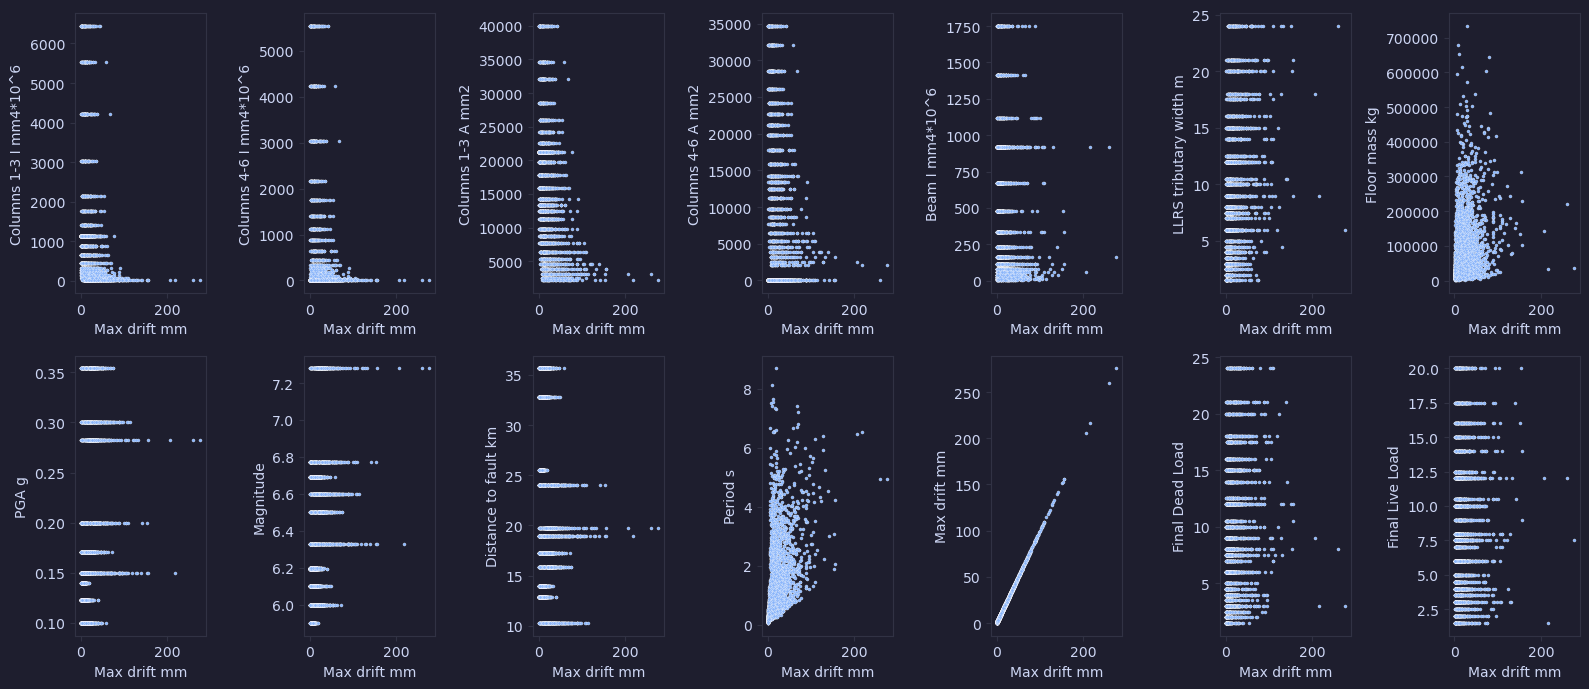

In [19]:
nrows = 2
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(16, 7), tight_layout=True)
a = 0
for i in range(nrows):
    for j in range(ncols):
        sns.scatterplot(data=numeric_train, y=numeric_train.columns[a],
                        x=numeric_train['Max drift mm'], ax=axs[i, j], s=5)
        a += 1


In [20]:
fig = px.parallel_coordinates(numeric_train, color='Max drift mm', color_continuous_scale=px.colors.diverging.PiYG,
                              dimensions=['Max drift mm', 'Columns 1-3 I mm4*10^6', 'Columns 4-6 I mm4*10^6', 'Columns 1-3 A mm2', 'Columns 4-6 A mm2', 'Beam I mm4*10^6', 'LLRS tributary width m', 'Floor mass kg', 'PGA g', 'Magnitude', 'Distance to fault km', 'Period s', 'Final Dead Load', 'Final Live Load'])
fig.update_traces(labelangle=-90, labelside='top')
fig.update_layout(margin={'t': 180}, template='plotly_dark')
fig.show()


### Let's see the correlation among the numeric features. You will notice some of them will have a high correlation and some others will have very low correlation with the value to predict

<Axes: >

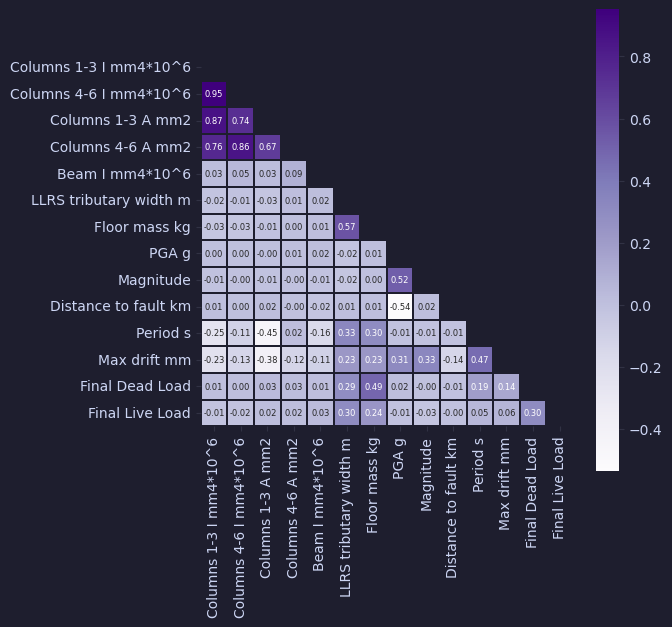

In [21]:
mask = np.triu(np.ones_like(numeric_train.corr()))
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_train.corr(), mask=mask, cmap='Purples',
            annot=True, fmt='.2f', linewidths=0.1, linecolor='#1E1E2E',
            square=True, annot_kws={'size': 6})


In [22]:
train = train.sort_values('Max drift mm', ascending=True).reset_index(drop=True)

## ML Model

### Here comes the tricky part. First we need to discover some transformation (preprocessing) for the machine learning model, either it be scikit-based, xgboost based, neural network, etc. The machine learning models prefer to have the data as normalised as possible

### But first... an ol' train_test_split for creating the training and validation sets

In [23]:
from sklearn.model_selection import train_test_split

X = train.drop('Max drift mm', axis=1)
y = train['Max drift mm']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=2500, shuffle=True)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(2500, 22)
(422, 22)
(2500,)
(422,)


### Let's see what has been chosen for test and validation set

In [24]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=X_train['Period s'],
    x=y_train,
    mode='markers',
    name='Train'
))

fig.add_trace(go.Scatter(
    y=X_val['Period s'],
    x=y_val,
    mode='markers',
    name='Validation'
))

fig.update_yaxes(title='Period s')
fig.update_xaxes(title='Max drift mm')

fig.update_layout(template='plotly_dark', title=dict(text='Train-Validation Split', font=dict(size=24)),
                  height=600, width=800)
fig.show()


### Now build the Pipeline for transforming the independent features

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, QuantileTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error


chain_transf = Pipeline(steps=[
    ('log', FunctionTransformer(
        func=np.log1p, inverse_func=np.expm1, validate=True, feature_names_out='one-to-one')),
    ('norm', Normalizer()),
    ('std', StandardScaler())
])  # 'LLRS tributary width m', 'Distance to fault km', 'Final dead load', 'Final live load'

oth_transf = Pipeline(steps=[
    ('log', FunctionTransformer(
        func=np.log1p, inverse_func=np.expm1, validate=True, feature_names_out='one-to-one')),
    ('std', StandardScaler())
])  # 'Floor mass kg'

third_transf = Pipeline(steps=[
    ('log', FunctionTransformer(
        func=np.log1p, inverse_func=np.expm1, validate=True, feature_names_out='one-to-one')),
    ('pow', QuantileTransformer(output_distribution='normal'))
]
)

ord_encoder = OneHotEncoder(sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('cat1', ord_encoder, ['Column fy Mpa',
     'Beam fy Mpa', 'Floor height m', 'Span width m']),
    ('1st_num', chain_transf, ['LLRS tributary width m',
     'Distance to fault km', 'Final Dead Load', 'Final Live Load']),
    ('2nd_num', oth_transf, ['Floor mass kg']),
    ('3rd_num', third_transf, ['Columns 1-3 I mm4*10^6', 'Columns 4-6 I mm4*10^6',
     'Columns 1-3 A mm2', 'Columns 4-6 A mm2', 'Beam I mm4*10^6', 'PGA g', 'Magnitude', 'Period s'])
], remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

preprocessor


ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('cat1', OneHotEncoder(sparse_output=False),
                                 ['Column fy Mpa', 'Beam fy Mpa',
                                  'Floor height m', 'Span width m']),
                                ('1st_num',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      inverse_func=<ufunc 'expm1'>,
                                                                      validate=True)),
                                                 ('norm', Normalizer()),
                                                 ('std', Standa...
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      inverse_func=<ufunc 'expm1'>,
                                                                      validate=True)),
                                                 ('pow',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 ['Columns 1-3 I mm4*10^6',
                                  'Columns 4-6 I mm4*10^6', 'Columns 1-3 A mm2',
                                  'Columns 4-6 A mm2', 'Beam I mm4*10^6',
                                  'PGA g', 'Magnitude', 'Period s'])],
                  verbose_feature_names_out=False)

In [26]:
train_num_check = pd.DataFrame(
    data=preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()
)

train_num_check['Max drift mm'] = QuantileTransformer(
    output_distribution='normal').fit_transform(y_train.to_numpy().reshape(-1, 1))

val_num_check = pd.DataFrame(
    data=preprocessor.fit_transform(X_val),
    columns=preprocessor.get_feature_names_out()
)

val_num_check['Max drift mm'] = QuantileTransformer(
    output_distribution='normal').fit_transform(y_val.to_numpy().reshape(-1, 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train_num_check['Period s'],
    y=train_num_check['Max drift mm'],
    mode='markers',
    name='Train'
))

fig.add_trace(go.Scatter(
    x=val_num_check['Period s'],
    y=val_num_check['Max drift mm'],
    mode='markers',
    name='Validation'
))

fig.update_xaxes(title='Period s')
fig.update_yaxes(title='Max drift mm')

fig.update_layout(template='plotly_dark', title=dict(text='Train-Validation Split', font=dict(size=24)),
                  height=400, width=600)
fig.show()


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

### Let's write a couple of functions for cross validation and prediction

In [67]:
def cross_val(regressor, X=X_train, y=y_train, cv=5):
    from sklearn.model_selection import cross_validate
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    cv_results = cross_validate(
        estimator=regressor,
        X=X,
        y=y,
        cv=cv,
        scoring=['neg_mean_absolute_error',
                 'r2', 'neg_root_mean_squared_error'],
        return_train_score=True,
        n_jobs=-1
    )

    fig = make_subplots(rows=1, cols=3, shared_xaxes=True)

    fig.add_trace(go.Scatter(y=(-cv_results['test_neg_mean_absolute_error']),
                  x=np.arange(1, cv+1, 1), name='MAE_test'), row=1, col=1)
    fig.add_trace(go.Scatter(y=(-cv_results['train_neg_mean_absolute_error']),
                  x=np.arange(1, cv+1, 1), name='MAE_train'), row=1, col=1)
    fig.add_trace(go.Scatter(y=(-cv_results['test_neg_root_mean_squared_error']),
                  x=np.arange(1, cv+1, 1), name='RMSE_test'), row=1, col=2)
    fig.add_trace(go.Scatter(y=(-cv_results['train_neg_root_mean_squared_error']),
                  x=np.arange(1, cv+1, 1), name='RMSE_train'), row=1, col=2)
    fig.add_trace(go.Scatter(y=cv_results['test_r2'], x=np.arange(
        1, cv+1, 1), name='R2_test'), row=1, col=3)
    fig.add_trace(go.Scatter(y=cv_results['train_r2'], x=np.arange(
        1, cv+1, 1), name='R2_train'), row=1, col=3)

    fig.update_yaxes(title_text='Mean Abs Error', row=1, col=1)
    fig.update_yaxes(title_text='Root Mean Sq Error', row=1, col=2)
    fig.update_yaxes(title_text='R2 Score', row=1, col=3)

    fig.update_xaxes(title_text='Folds', range=[1, cv])

    fig.update_layout(template='plotly_dark', title=dict(
        text='Cross Val Score', font=dict(size=24)))

    return fig.show()


def predict_plot(estimator, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_val)
    mae = mean_absolute_error(y_true=y_val, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_val, y_pred=y_pred)
    r2 = r2_score(y_true=y_val, y_pred=y_pred)
    rmse = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_pred))
    title_graph = f'MAE {mae:.2f} | MAPE {mape:.2f} | R2 {r2:.2f} | RMSE {rmse:.2f}'

    fig = make_subplots(rows=1, cols=2, subplot_titles=(
        'Actual vs Predicted', 'Residuals vs Predicted'))

    fig.add_trace(go.Scatter(y=y_val, x=y_pred, mode='markers',
                  name='Act vs Pred'), row=1, col=1)
    fig.add_shape(type='line', line={'dash': 'dash'}, x0=y_val.min(
    ), y0=y_val.min(), x1=y_val.max(), y1=y_val.max(), row=1, col=1)

    residuals = y_pred - y_val
    fig.add_trace(go.Scatter(x=y_pred, y=residuals,
                  mode='markers', name='Residuals'), row=1, col=2)
    fig.add_shape(type='line', line={'dash': 'dash'},
                  x0=y_pred.min(), x1=y_pred.max(), row=1, col=2)

    fig.update_layout(template='plotly_dark', title=dict(
        text=title_graph, font=dict(size=24)))

    return fig.show()


### Let us begin with a single model... the Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

lr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])

lr_clf_tr = TransformedTargetRegressor(
    regressor=lr_clf,
    transformer=third_transf
)

lr_clf_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'Columns '
                                                                                        '4-6 '
                                                                                        'A '
                                                                                        'mm2',
                                                                                        'Beam '
                                                                                        'I '
                                                                                        'mm4*10^6',
                                                                                        'PGA '
                                                                                        'g',
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('lr',
                                                      LinearRegression())]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
          

In [29]:
cross_val(lr_clf, X_train, y_train, 10)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [68]:
predict_plot(lr_clf)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### So... not a good model :(. The model is not doing anythings else but guessing. Let's try another one

In [31]:
from sklearn.linear_model import Ridge

ridge_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Ridge(alpha=0.1, max_iter=15000, solver='saga'))
])

ridge_clr_tr = TransformedTargetRegressor(
    regressor=ridge_clf,
    transformer=chain_transf
)
ridge_clr_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'mm2',
                                                                                        'Beam '
                                                                                        'I '
                                                                                        'mm4*10^6',
                                                                                        'PGA '
                                                                                        'g',
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('lasso',
                                                      Ridge(alpha=0.1,
                                                            max_iter=15000,
                                                            solver='saga'))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('norm', Normalizer()),
                                                       ('std',
   

In [32]:
cross_val(ridge_clf, X_train, y_train, 10)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [69]:
predict_plot(ridge_clf)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### Nothing better with the Ridge regressor. Let's try a "stronger" one

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_jobs=-1))
])

rf_clf_tr = TransformedTargetRegressor(
    regressor=rf_clf,
    transformer=third_transf
)
rf_clf_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'A '
                                                                                        'mm2',
                                                                                        'Beam '
                                                                                        'I '
                                                                                        'mm4*10^6',
                                                                                        'PGA '
                                                                                        'g',
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('rf',
                                                      RandomForestRegressor(n_jobs=-1))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [35]:
cross_val(rf_clf_tr, cv=10)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [70]:
predict_plot(rf_clf_tr)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### Wow... talk about improvement. Let's adjust some hyperparameters to see if we can improve it

In [37]:
rf_clf_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_jobs=-1, n_estimators=10, max_depth=10))
])

rf_clf_tr_2 = TransformedTargetRegressor(
    regressor=rf_clf,
    transformer=third_transf
)
rf_clf_tr_2.fit(X_train, y_train)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'A '
                                                                                        'mm2',
                                                                                        'Beam '
                                                                                        'I '
                                                                                        'mm4*10^6',
                                                                                        'PGA '
                                                                                        'g',
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('rf',
                                                      RandomForestRegressor(n_jobs=-1))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [38]:
cross_val(rf_clf_tr_2)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [71]:
predict_plot(rf_clf_tr_2)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### So there is some improvement, but not so much as from the base estimator. Let's try another model

In [40]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('hgb', HistGradientBoostingRegressor(max_iter=250, learning_rate=0.07, max_depth=10))
])

hgb_clf_tr = TransformedTargetRegressor(
    regressor=hgb_clf,
    transformer=third_transf
)

hgb_clf_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('hgb',
                                                      HistGradientBoostingRegressor(learning_rate=0.07,
                                                                                    max_depth=10,
                                                                                    max_iter=250))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [41]:
cross_val(hgb_clf_tr, X_train, y_train, cv=10)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [72]:
predict_plot(hgb_clf_tr)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### There is some improvement. Now trying a Gradient Boosting regressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

hl_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient', GradientBoostingRegressor(n_estimators=250, learning_rate=0.07, criterion='squared_error', max_depth=5))
])

hl_clf_tr = TransformedTargetRegressor(
    regressor=hl_clf,
    transformer=third_transf
)

hl_clf_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                        verbose_feature_names_out=False)),
                                                     ('gradient',
                                                      GradientBoostingRegressor(criterion='squared_error',
                                                                                learning_rate=0.07,
                                                                                max_depth=5,
                                                                                n_estimators=250))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [44]:
cross_val(hl_clf_tr)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [73]:
predict_plot(hl_clf_tr)


/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### And a final model... just for checking

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

etr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kernel', ExtraTreesRegressor(n_estimators=300, max_depth=15, n_jobs=-1))
    ]
)

etr_clf_tr = TransformedTargetRegressor(
    regressor=etr_clf,
    transformer=third_transf
)

etr_clf_tr


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                                        'PGA '
                                                                                        'g',
                                                                                        'Magnitude',
                                                                                        'Period '
                                                                                        's'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('kernel',
                                                      ExtraTreesRegressor(max_depth=15,
                                                                          n_estimators=300,
                                                                          n_jobs=-1))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [47]:
cross_val(etr_clf_tr)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [74]:
predict_plot(etr_clf_tr)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### And because we can... let's try the XGBoost

In [88]:
import xgboost as xgb

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.1))
])

xgb_clf_tr = TransformedTargetRegressor(
    regressor=xgb_clf,
    transformer=third_transf
)

xgb_clf_tr

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(n_jobs=-1,
                                                                        remainder='passthrough',
                                                                        transformers=[('cat1',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['Column '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Beam '
                                                                                        'fy '
                                                                                        'Mpa',
                                                                                        'Floor '
                                                                                        'height '
                                                                                        'm',
                                                                                        'Span '
                                                                                        'width '
                                                                                        'm']),
                                                                                      ('1st_num',
                                                                                       Pipeline(steps=[('log',
                                                                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                            func=<ufunc 'lo...
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=500,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...))]),
                           transformer=Pipeline(steps=[('log',
                                                        FunctionTransformer(feature_names_out='one-to-one',
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)),
                                                       ('pow',
                                                        QuantileTransformer(output_distribution='normal'))]))

In [89]:
cross_val(xgb_clf_tr)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

In [90]:
predict_plot(xgb_clf_tr)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


### Let's build a dataframe showing the results of all the estimators

In [91]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

estimators = [rf_clf_tr_2, hgb_clf_tr, hl_clf_tr, etr_clf_tr, xgb_clf_tr]
results_dict = {}
for estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_val)
    mae = mean_absolute_error(y_true=y_val, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_val, y_pred=y_pred)
    r2 = r2_score(y_true=y_val, y_pred=y_pred)
    rmse = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_pred))
    results_dict[str(estimator.regressor_[-1]).split('(')[0]]={'mae':mae, 'mape':mape, 'r2':r2, 'rmse':rmse}
    
results = pd.DataFrame.from_dict(results_dict, orient='index')
results

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Functio

mae  mape    r2  rmse
RandomForestRegressor          3.35  0.18  0.90  6.01
HistGradientBoostingRegressor  2.64  0.15  0.94  4.64
GradientBoostingRegressor      2.79  0.15  0.93  4.88
ExtraTreesRegressor            2.93  0.19  0.93  4.96
XGBRegressor                   2.90  0.14  0.91  5.55

### So, after various models, it can be seen not all of them improve so much. It might be possible to run a Grid Search for hipertuning the parameters, although not all the times the improvement is considerable. 

### For predicting, I will include a percentage of each best regressor (HGBR, GBR, XGB), which will sum up to 100% of the value

In [101]:
from sklearn.metrics import PredictionErrorDisplay
from plotly.subplots import make_subplots

X_val['preds'] = (hgb_clf_tr.predict(X_val)*0.35) + (hl_clf_tr.predict(X_val)*0.3) + (xgb_clf_tr.predict(X_val)*0.35)
X_val['val'] = y_val

mae = mean_absolute_error(y_true=X_val['val'], y_pred=X_val['preds'])
mape = mean_absolute_percentage_error(y_true=X_val['val'], y_pred=X_val['preds'])
r2 = r2_score(y_true=X_val['val'], y_pred=X_val['preds'])
rmse = np.sqrt(mean_squared_error(y_true=X_val['val'], y_pred=X_val['preds']))
title_graph = f'MAE {mae:.2f} | MAPE {mape:.2f} | R2 {r2:.2f} | RMSE {rmse:.2f}'

fig = make_subplots(rows=1, cols=2, subplot_titles=(
        'Actual vs Predicted', 'Residuals vs Predicted'))

fig.add_trace(go.Scatter(x=X_val['preds'], y=X_val['val'], mode='markers',
                name='Act vs Pred'), row=1, col=1)
fig.add_shape(type='line', line={'dash': 'dash'}, x0=y_val.min(
), y0=y_val.min(), x1=y_val.max(), y1=y_val.max(), row=1, col=1)

X_val['residuals'] = X_val['preds'] - X_val['val']
fig.add_trace(go.Scatter(x=X_val['preds'], y=X_val['residuals'],
                mode='markers', name='Residuals'), row=1, col=2)
fig.add_shape(type='line', line={'dash': 'dash'},
                x0=y_pred.min(), x1=y_pred.max(), row=1, col=2)

fig.update_layout(template='plotly_dark', title=dict(
    text=title_graph, font=dict(size=24)))

### Now predict on the test dataset and create the submission file

In [103]:
test['Max drift mm'] = (hgb_clf_tr.predict(test)*0.35) + (hl_clf_tr.predict(test)*0.3) + (xgb_clf_tr.predict(test)*0.35)

test.head()

Column fy Mpa  Beam fy Mpa  Columns 1-3 I mm4*10^6  Columns 4-6 I mm4*10^6   
0          355.0        355.0                 5538.00                 4221.00  \
1          355.0        235.0                 1119.00                    0.00   
2          235.0        235.0                   10.33                    6.06   
3          355.0        235.0                  637.20                    0.00   
4          275.0        235.0                 1119.00                    0.00   

   Columns 1-3 A mm2  Columns 4-6 A mm2  Beam I mm4*10^6  Spans   
0            34685.0            32053.0           231.30    4.0  \
1            21176.0                0.0           482.00    5.0   
2             3142.0             2534.0          1752.00    1.0   
3            17803.0                0.0           231.30    2.0   
4            21176.0                0.0            13.17    1.0   

   Number of floors  Floor height m  Span width m  LLRS tributary width m   
0               4.0             3.0           3.0                     2.5  \
1               1.0             4.0           3.0                     3.0   
2               6.0             3.0           3.0                     8.0   
3               1.0             3.0           8.0                    14.0   
4               2.0             3.0           3.0                     7.5   

   Floor mass kg  Facade Load kN/m  PGA g  Magnitude  Distance to fault km   
0       17579.63               4.0   0.35       6.50                 15.82  \
1       15968.50               0.0   0.14       5.90                 25.50   
2       10531.46               2.0   0.28       7.28                 19.74   
3      165958.21               4.0   0.30       6.60                 10.27   
4        4496.88               0.0   0.15       6.20                 13.91   

   Period s  Final Dead Load  Final Live Load  soil_class__B  soil_class__C   
0      0.22              7.5              5.0            1.0            0.0  \
1      0.08              9.0              6.0            0.0            1.0   
2      2.38              8.0             12.0            0.0            1.0   
3      0.34             21.0              7.0            1.0            0.0   
4      0.18              1.5              6.0            1.0            0.0   

   Max drift mm  
0          4.03  
1          0.44  
2         30.39  
3         16.58  
4          1.86

In [104]:
submit_4 = test['Max drift mm'].reset_index(drop=False)
submit_4 = submit_4.rename(columns={'index':'Index'})
submit_4.to_csv('submit_6.csv', index=False)